## Importing the libraries we are going to use.

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Merging all thr CSV files (sales files from Jan to Dec)
    First things first, select the path that contains all the CSVs.
    Prepare the dataframe that will include all the CSVs.
    Use os.listdir to return a list of all files inside that path.
    Create a temporary dataframe (df) to read the CSV files.
    The last step is to merge each file that has been read into the sales_df (the main dataframe).
    (Optional) Save the merged dataframe in case you want to use it again.

In [2]:
path = "./Sales_Data/"
listOfCSVs = os.listdir(path)
sales_df = pd.DataFrame()

print("total count of CSVs: ",len(listOfCSVs))
for csv in listOfCSVs:
    df = pd.read_csv(path + csv)
    sales_df = pd.concat([sales_df, df])
    print(f"file {csv} has been merged!")
# sales_df.to_csv('allMonSalesData.csv', index=False)

total count of CSVs:  12
file Sales_April_2019.csv has been merged!
file Sales_August_2019.csv has been merged!
file Sales_December_2019.csv has been merged!
file Sales_February_2019.csv has been merged!
file Sales_January_2019.csv has been merged!
file Sales_July_2019.csv has been merged!
file Sales_June_2019.csv has been merged!
file Sales_March_2019.csv has been merged!
file Sales_May_2019.csv has been merged!
file Sales_November_2019.csv has been merged!
file Sales_October_2019.csv has been merged!
file Sales_September_2019.csv has been merged!


## Here's the Analysis: What does the data tell us
### 1. Clean the data first, then prepare the datatype of the columns for analysis

    First, we need to count the number of null values in each column. Sometimes, we can fill them with the mean, mode, or other strategies. However, it's worth noting that all columns have the same count of null values in this project, so we won't need to fill the missing data.

    I also observed that some columns have repeated values similar to their column names. I've created a list that contains column names and filtered the entire dataframe to remove rows where the value matches the column name. check (# *1 ) comment

    After that, I prepared the datatypes of the columns.

    Finally, I created 'month,' 'city,' and 'sales' columns to perform analysis on them. It's important to mention that the 'city' column is extracted from another column, 'Purchase Address,' and split into an array of strings after each ','."

In [3]:
sales_df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [4]:
sales_df = sales_df.dropna()

In [5]:
sales_df[sales_df['Product']=='Product'] # *1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [6]:
values_to_drop = list(sales_df.columns)

In [7]:
sales_df = sales_df[~sales_df.isin(values_to_drop)]

In [8]:
sales_df.loc[:,'Order Date'] = pd.to_datetime(sales_df['Order Date'], format = '%m/%d/%y %H:%M')
sales_df.loc[:, 'Price Each'] = sales_df['Price Each'].astype(np.float32)
sales_df.loc[:, 'Quantity Ordered'] = sales_df['Quantity Ordered'].astype(np.float32)

In [9]:
sales_df['Month'] = sales_df['Order Date'].dt.month
sales_df['Sales'] = sales_df['Price Each'] * sales_df['Quantity Ordered']
sales_df['Time-Hour'] = sales_df['Order Date'].dt.hour

split_data = sales_df['Purchase Address'].str.split(',', expand=True)
# split_data[1]

sales_df['City'] = split_data[1] + ' (' + split_data[2].str[:3] + ' )'

### 2. What's the best month for sales?, How much was earned that month?

In [10]:
best_month = sales_df.groupby('Month')['Sales'].sum().sort_values(ascending=False).to_frame().reset_index()
best_month

,Month,Sales
0,12.0,4613443.50
1,10.0,3736726.75
2,4.0,3390670.25
3,11.0,3199603.25
4,5.0,3152606.75
5,3.0,2807100.25
6,7.0,2647775.75
7,6.0,2577802.25
8,8.0,2244467.75
9,2.0,2202022.50


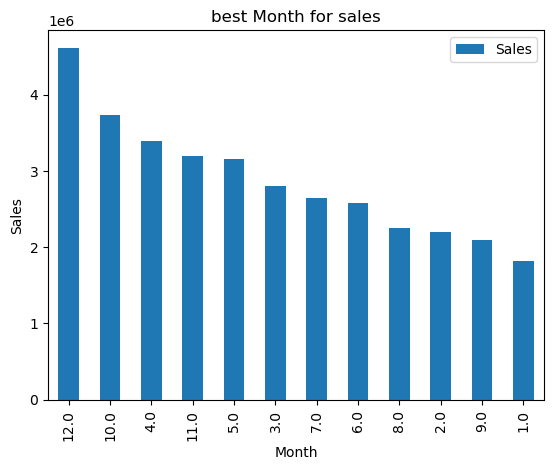

In [11]:
ax = best_month.plot(x='Month', y='Sales', kind='bar')

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('best Month for sales')

# Show the plot
plt.show()

### What city had the highest number of sales?

In [12]:
best_city = sales_df.groupby('City')['Sales'].sum().sort_values(ascending=False).to_frame().reset_index()
best_city

,City,Sales
0,San Francisco ( CA ),8.262204e+06
1,Los Angeles ( CA ),5.452571e+06
2,New York City ( NY ),4.664318e+06
3,Boston ( MA ),3.661642e+06
4,Atlanta ( GA ),2.795498e+06
5,Dallas ( TX ),2.767976e+06
6,Seattle ( WA ),2.747756e+06
7,Portland ( OR ),1.870732e+06
8,Austin ( TX ),1.819582e+06
9,Portland ( ME ),4.497583e+05


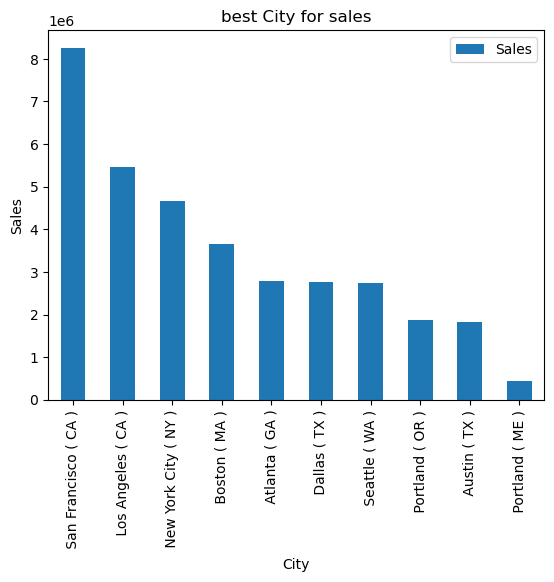

In [13]:
ax = best_city.plot(x='City', y='Sales', kind='bar')

plt.xlabel('City')
plt.ylabel('Sales')
plt.title('best City for sales')


plt.show()

### What time should we display advertisements to maximize likelihood of customer's buying product?

In [14]:
best_hour = sales_df['Time-Hour'].value_counts().to_frame().reset_index()
best_hour = best_hour.rename(columns={'index':'Time-Hour', 'Time-Hour':'Count'}).sort_values(by=['Time-Hour'])
best_hour

,Time-Hour,Count
17,0.0,3910
19,1.0,2350
21,2.0,1243
23,3.0,831
22,4.0,854
20,5.0,1321
18,6.0,2482
16,7.0,4011
15,8.0,6256
13,9.0,8748


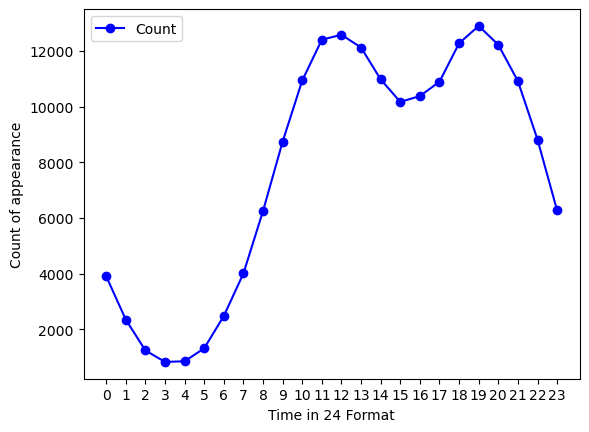

In [15]:
ax = best_hour.plot(x='Time-Hour', y='Count', kind='line', marker='o', color='blue')


plt.xlabel('Time in 24 Format')
plt.ylabel('Count of appearance')
plt.xticks(list(best_hour['Time-Hour']))

plt.show()

### What products are most often sold together?

In [16]:
sales_df = sales_df.sort_values(by=['Order ID', 'Product'])
sales_df = sales_df.reset_index(drop=True)
products_df = sales_df.drop_duplicates(subset=['Order ID', 'Product'], keep='last')
products_df = products_df.reset_index(drop=True)
products_df['Product_Group'] = products_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
products_df['Product_Group'] = products_df['Product_Group'].astype(str)

products_df[products_df['Product_Group'].str.contains(',')]['Product_Group'].value_counts()[:10]

Lightning Charging Cable,iPhone                       1790
Google Phone,USB-C Charging Cable                     1738
Wired Headphones,iPhone                                748
USB-C Charging Cable,Vareebadd Phone                   636
Google Phone,Wired Headphones                          622
Apple Airpods Headphones,iPhone                        598
Bose SoundSport Headphones,Google Phone                338
Google Phone,USB-C Charging Cable,Wired Headphones     240
Vareebadd Phone,Wired Headphones                       220
AA Batteries (4-pack),Lightning Charging Cable         206
Name: Product_Group, dtype: int64

### What product sold the most? Why do you think it sold the most?

In [17]:
order_quantity = sales_df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).to_frame().reset_index()
order_quantity

,Product,Quantity Ordered
0,AAA Batteries (4-pack),31017.0
1,AA Batteries (4-pack),27635.0
2,USB-C Charging Cable,23975.0
3,Lightning Charging Cable,23217.0
4,Wired Headphones,20557.0
5,Apple Airpods Headphones,15661.0
6,Bose SoundSport Headphones,13457.0
7,27in FHD Monitor,7550.0
8,iPhone,6849.0
9,27in 4K Gaming Monitor,6244.0


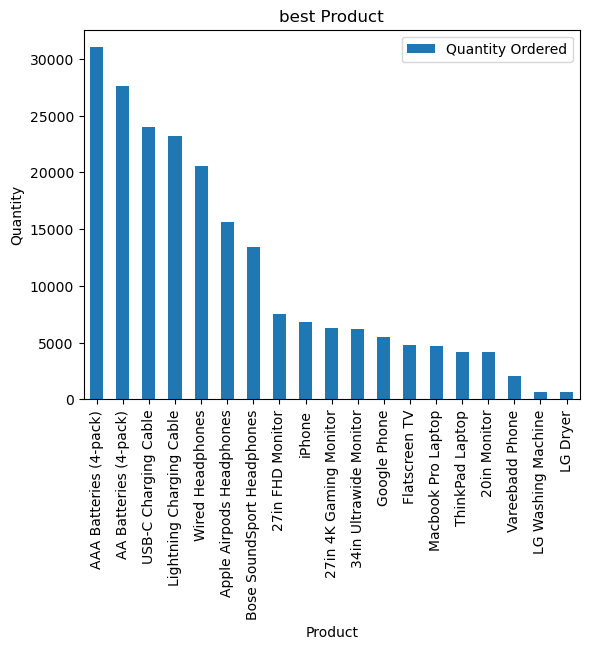

In [18]:
ax = order_quantity.plot(x='Product', y='Quantity Ordered', kind='bar')

plt.xlabel('Product')
plt.ylabel('Quantity')
plt.title('best Product')


plt.show()

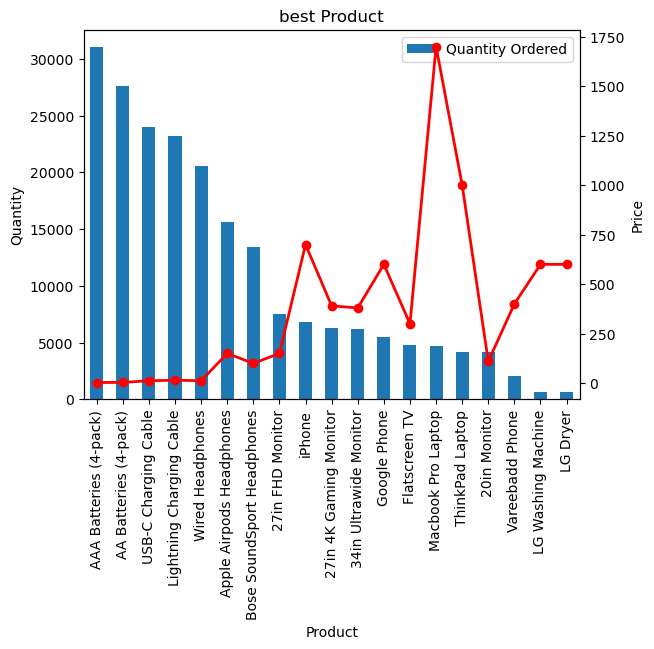

In [19]:
ax = order_quantity.plot(x='Product', y='Quantity Ordered', kind='bar')

plt.xlabel('Product')
plt.ylabel('Quantity')
plt.title('best Product')

ax2 = ax.twinx()
prices = sales_df.groupby('Product')['Price Each'].mean().sort_values(ascending=False).to_frame().reset_index()
order_quanitiy = pd.merge(order_quantity, prices, on=['Product'])

ax2.plot(order_quanitiy['Product'], order_quanitiy['Price Each'], color='red', marker='o', linestyle='-', linewidth=2)

plt.ylabel('Price') 
plt.show()